Import libraries

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import functions as ff

Scaling using Standard Scaler

In [30]:
df= pd.read_excel('../df_SPY_VBMFX_Macro_Signals.xlsx',index_col=0,sheet_name='Sheet1')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)

Use PCA to reduce redundancy.

In [31]:
pca = PCA(n_components=0.95, random_state=42) # initialize pca object, 42 seed data
X_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(
    X_pca,
    index=df_scaled.index,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

In [32]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 390 entries, 1993-04-30 to 2025-09-30
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     390 non-null    float64
 1   PC2     390 non-null    float64
 2   PC3     390 non-null    float64
 3   PC4     390 non-null    float64
 4   PC5     390 non-null    float64
 5   PC6     390 non-null    float64
 6   PC7     390 non-null    float64
 7   PC8     390 non-null    float64
 8   PC9     390 non-null    float64
 9   PC10    390 non-null    float64
 10  PC11    390 non-null    float64
 11  PC12    390 non-null    float64
 12  PC13    390 non-null    float64
 13  PC14    390 non-null    float64
 14  PC15    390 non-null    float64
 15  PC16    390 non-null    float64
 16  PC17    390 non-null    float64
 17  PC18    390 non-null    float64
 18  PC19    390 non-null    float64
 19  PC20    390 non-null    float64
 20  PC21    390 non-null    float64
 21  PC22    390 non-null

In [33]:
df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
1993-04-30,2.834977,-5.039700,-1.219851,1.499993,-0.885268,-0.717552,-0.492937,3.037461,-2.573233,-0.535718,...,-0.164548,-0.672810,1.271284,-0.264927,-0.042847,-0.235843,2.294925,0.874933,0.108751,-0.532134
1993-05-31,0.072084,-4.776976,-3.246425,1.338798,-0.445240,-2.341074,0.224007,1.759112,-2.402277,-0.339296,...,-0.616069,1.313068,1.138813,-0.586427,-0.909656,0.654845,-0.688057,0.252171,1.039216,-0.511470
1993-06-30,2.433469,-5.623942,-0.246899,-1.309423,-1.711940,-2.981699,2.064498,0.424718,-0.476116,-1.579785,...,1.377787,1.809618,0.742524,-0.590238,-1.043465,1.040109,-0.434216,0.271846,0.703035,0.055426
1993-07-31,0.870174,-4.916832,-2.702818,-0.515409,-1.231429,-0.705571,0.288317,2.726298,-1.697834,0.838593,...,-0.936013,-0.192222,0.692186,0.242177,-1.043458,-0.024286,1.512879,0.317343,1.287949,0.801513
1993-08-31,4.093231,-5.658279,-0.590671,-4.094341,-0.511332,-1.699335,1.007804,1.442087,-0.898796,-0.094163,...,0.802587,0.606505,0.604402,0.389869,-1.219660,0.194227,0.783853,0.501064,0.818518,0.106738


Using PCA we reduced our features from 90 to a new 24 modified features. These 24 features explain 95% of the variance in the data set.

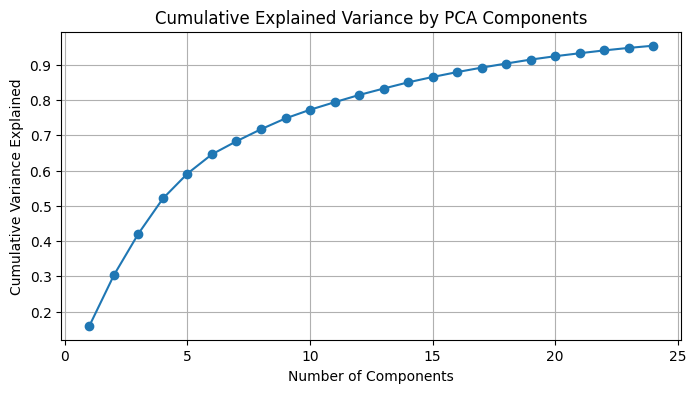

Number of components selected: 24


In [34]:
explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()
print(f"Number of components selected: {pca.n_components_}")

Clustering

We will use the results of the PCA analysis for clustering

In [35]:
best_k = 4 # k=4
kmeans = KMeans(n_clusters=best_k, random_state=42,n_init=10) #n_init=10 is 'auto'
df_clusters = df_pca.copy()
df_clusters['Regime'] = kmeans.fit_predict(df_pca)

Graph below shows the regime clusters over time.

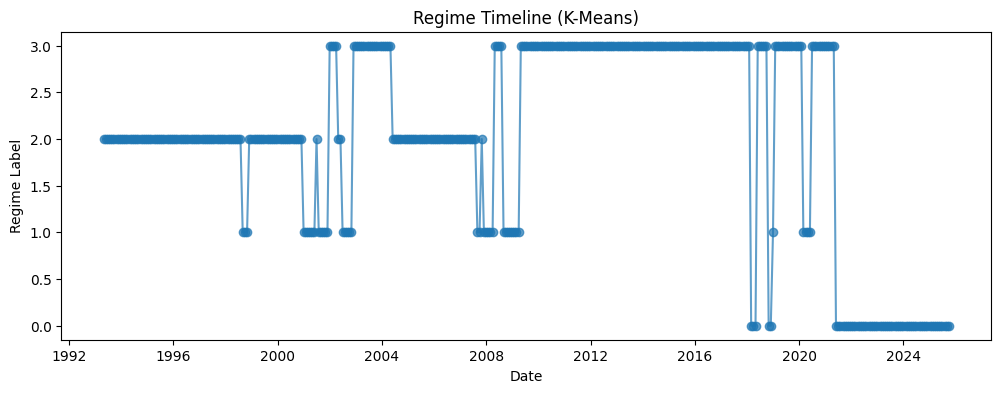

In [36]:
plt.figure(figsize=(12,4))
plt.plot(df_clusters.index, df_clusters['Regime'], marker='o', linestyle='-', alpha=0.7)
plt.title("Regime Timeline (K-Means)")
plt.xlabel("Date")
plt.ylabel("Regime Label")
plt.grid(True)
plt.grid()
plt.show()

In [37]:
df_clusters

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,Regime
1993-04-30,2.834977,-5.039700,-1.219851,1.499993,-0.885268,-0.717552,-0.492937,3.037461,-2.573233,-0.535718,...,-0.672810,1.271284,-0.264927,-0.042847,-0.235843,2.294925,0.874933,0.108751,-0.532134,2
1993-05-31,0.072084,-4.776976,-3.246425,1.338798,-0.445240,-2.341074,0.224007,1.759112,-2.402277,-0.339296,...,1.313068,1.138813,-0.586427,-0.909656,0.654845,-0.688057,0.252171,1.039216,-0.511470,2
1993-06-30,2.433469,-5.623942,-0.246899,-1.309423,-1.711940,-2.981699,2.064498,0.424718,-0.476116,-1.579785,...,1.809618,0.742524,-0.590238,-1.043465,1.040109,-0.434216,0.271846,0.703035,0.055426,2
1993-07-31,0.870174,-4.916832,-2.702818,-0.515409,-1.231429,-0.705571,0.288317,2.726298,-1.697834,0.838593,...,-0.192222,0.692186,0.242177,-1.043458,-0.024286,1.512879,0.317343,1.287949,0.801513,2
1993-08-31,4.093231,-5.658279,-0.590671,-4.094341,-0.511332,-1.699335,1.007804,1.442087,-0.898796,-0.094163,...,0.606505,0.604402,0.389869,-1.219660,0.194227,0.783853,0.501064,0.818518,0.106738,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,-3.296443,3.317698,2.217505,1.209034,2.562888,1.414897,-0.592066,-0.636494,0.912194,1.310254,...,-0.221857,1.305591,0.666187,-1.140831,-1.027048,-0.200598,-0.134664,2.080067,-2.024529,0
2025-06-30,-0.925961,2.714414,3.901765,-2.114980,3.925986,0.882777,0.980704,-2.169835,0.381750,0.664493,...,-1.013094,0.445130,0.001731,-0.734936,-0.950000,-0.089458,-0.075058,1.062384,-2.007681,0
2025-07-31,-3.537033,2.933367,2.416156,-1.297943,4.274138,1.147054,-0.800159,-0.622168,0.024501,0.031928,...,-0.248611,0.704014,-0.582609,0.611625,-1.238095,-0.887727,-0.458933,1.857454,-1.108513,0
2025-08-31,-1.177103,2.579409,4.606636,-1.850575,2.322168,2.855817,-0.150433,-0.888448,0.598903,-1.179163,...,-0.515127,0.302041,-0.319522,-0.843352,-0.323657,-0.194062,0.778692,1.366309,-1.751140,0


We will use the cluster labels to add the regimes to our original data set.

In [38]:
df = df.join(df_clusters['Regime'], how='inner')

In [39]:
df_summary = df.groupby('Regime')[["SPY_3m","VBMFX_3m"]].agg(['mean','std']) # groupby using the regime, and then find teh mean and std
df_summary.columns = ['SPY_mean','SPY_std','VBMFX_mean','VBMFX_std'] # make single column

# Sharpe ratios ( excluding risk free rate) - using this as an estimate
df_summary['SPY_Sharpe'] = df_summary['SPY_mean'] / df_summary['SPY_std']
df_summary['VBMFX_Sharpe'] = df_summary['VBMFX_mean'] / df_summary['VBMFX_std']
df_summary = df_summary[['SPY_mean', 'SPY_std', 'SPY_Sharpe','VBMFX_mean','VBMFX_std','VBMFX_Sharpe']]

We are using a modified version of the sharpe ratio ( expected returns minus the risk-free rate divided by the standard deviation). We will exclude the risk-free return. This measure is a no risk adjusted ratio.

In [40]:
df_summary['Indicator'] = df_summary.apply(ff.bucket_indicator, axis=1)

In [41]:
df_summary['Bucket'] = df_summary.apply(ff.assign_bucket, axis=1)



In [45]:
bucket_map = df_summary['Bucket'].to_dict()
df['Bucket'] = df['Regime'].map(bucket_map)
df[df['Bucket']=="50/50"]

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,AAA_minus_10Y_Delta1m,AAA_minus_10Y_Delta3m,BAA_minus_10Y,BAA_minus_10Y_Delta1m,BAA_minus_10Y_Delta3m,BAA_minus_AAA,BAA_minus_AAA_Delta1m,BAA_minus_AAA_Delta3m,Regime,Bucket
1998-08-31,59.598267,-0.141180,-0.116716,-0.391303,0.094172,0.188343,-0.152196,-0.496435,3.494607,0.019076,...,3.100000e-01,0.38,2.06,0.35,0.43,0.65,4.000000e-02,0.05,1,50/50
1998-09-30,63.391060,0.063639,-0.098869,-0.340597,0.103442,0.206885,0.061696,-0.416420,3.563448,0.019699,...,3.900000e-01,0.73,2.57,0.51,0.90,0.77,1.200000e-01,0.17,1,50/50
1998-10-31,68.530884,0.081081,-0.012459,-0.048913,0.123595,0.247191,0.077962,-0.050150,3.543654,-0.005555,...,3.000000e-02,0.73,2.65,0.08,0.94,0.82,5.000000e-02,0.21,1,50/50
2000-12-31,83.756256,-0.005227,-0.083795,-0.295356,0.040242,0.080485,-0.005241,-0.350062,3.976101,0.017917,...,2.100000e-01,0.20,2.88,0.24,0.34,0.84,3.000000e-02,0.14,1,50/50
2001-01-31,87.480026,0.044460,-0.038564,-0.145559,0.059828,0.119656,0.043500,-0.157308,4.046173,0.017623,...,-1.200000e-01,0.20,2.62,-0.26,0.06,0.70,-1.400000e-01,-0.14,1,50/50
2001-02-28,79.135506,-0.095388,-0.060108,-0.219609,0.070893,0.141786,-0.100249,-0.247960,4.083253,0.009164,...,1.300000e-01,0.22,2.88,0.26,0.24,0.83,1.300000e-01,0.02,1,50/50
2001-03-31,74.700989,-0.056037,-0.108115,-0.367244,0.072117,0.144234,-0.057668,-0.457670,4.105610,0.005475,...,8.000000e-02,0.09,3.04,0.16,0.16,0.91,8.000000e-02,0.07,1,50/50
2001-04-30,81.083427,0.085440,-0.073121,-0.261938,0.095099,0.190198,0.081985,-0.303728,4.086659,-0.004616,...,-2.000000e-01,0.01,2.73,-0.31,0.11,0.80,-1.100000e-01,0.10,1,50/50
2001-05-31,80.628891,-0.005606,0.018871,0.077649,0.071703,0.143407,-0.005622,0.074782,4.117070,0.007441,...,-7.000000e-02,-0.19,2.65,-0.08,-0.23,0.79,-1.000000e-02,-0.04,1,50/50
2001-07-31,77.905083,-0.010196,-0.039198,-0.147813,0.009478,0.018956,-0.010248,-0.159950,4.231378,0.022351,...,1.300000e-01,0.03,2.78,0.13,0.05,0.82,-8.881784e-16,0.02,1,50/50


In [ ]:
df['Portfolio_Return'] = (
    df['Bucket'].map({'80/20':0.8,'70/30':0.7,'60/40':0.6,'50/50':0.5}) * df['SPY_3m'] +
    (1 - df['Bucket'].map({'80/20':0.8,'70/30':0.7,'60/40':0.6,'50/50':0.5})) * df['VBMFX_3m']
)


In [49]:
df

,SPY,SPY_mom,SPY_3m,SPY_3m_ann,SPY_3m_sd,SPY_3m_ann_sd,SPY_ln_3m,SPY_ann_ln_3m,VBMFX,VBMFX_mom,...,BAA_minus_10Y,BAA_minus_10Y_Delta1m,BAA_minus_10Y_Delta3m,BAA_minus_AAA,BAA_minus_AAA_Delta1m,BAA_minus_AAA_Delta3m,Regime,Bucket,Portfolio_Return,60/40 Return
1993-04-30,24.480000,-0.025587,0.006867,0.027754,0.025016,0.050031,-0.025920,0.027376,2.382549,0.007438,...,2.12,-0.06,0.01,0.76,0.18,0.06,2,60/40,0.016608,0.019043
1993-05-31,25.140213,0.026970,0.023107,0.095680,0.029114,0.058228,0.026612,0.091375,2.385895,0.001405,...,2.10,-0.02,-0.10,0.80,0.04,0.18,2,60/40,0.018890,0.017836
1993-06-30,25.230892,0.003607,0.004302,0.017319,0.026332,0.052664,0.003600,0.017170,2.428994,0.018064,...,2.16,0.06,-0.02,0.72,-0.08,0.14,2,60/40,0.013412,0.015689
1993-07-31,25.108412,-0.004854,0.025670,0.106704,0.016483,0.032966,-0.004866,0.101386,2.443795,0.006094,...,2.05,-0.11,-0.07,0.80,0.08,0.04,2,60/40,0.025685,0.025688
1993-08-31,26.070768,0.038328,0.037015,0.156484,0.022883,0.045767,0.037612,0.145384,2.485172,0.016931,...,1.91,-0.14,-0.19,0.71,-0.09,-0.09,2,60/40,0.038853,0.039312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,586.028015,0.062845,-0.005078,-0.020156,0.059701,0.119402,0.060949,-0.020362,9.469428,-0.007126,...,1.84,-0.12,0.27,0.74,-0.01,0.14,0,70/30,-0.004419,NaN
2025-06-30,616.141785,0.051386,0.107772,0.505918,0.038411,0.076822,0.050110,0.409403,9.618223,0.015713,...,1.75,-0.09,-0.01,0.65,-0.09,-0.03,0,70/30,0.079239,NaN
2025-07-31,630.332458,0.023032,0.143197,0.707987,0.020495,0.040991,0.022770,0.535316,9.589507,-0.002986,...,1.67,-0.08,-0.29,0.63,-0.02,-0.12,0,70/30,0.101878,NaN
2025-08-31,643.266602,0.020520,0.097672,0.451746,0.017142,0.034284,0.020312,0.372767,9.669253,0.008316,...,1.80,0.13,-0.04,0.61,-0.02,-0.13,0,70/30,0.074701,NaN
